In [14]:
import yaml
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from SimBMVtool import SimBMVtool as sim

path_config = './config_simu.yaml'

# Create temporary config file for notebook tests
path_tmp_config = '../outputs_dev/tmp_config_simu.yaml'
with open(path_config, 'r') as file: tmp_config = yaml.safe_load(file)

paths: {'irf': '/fefs/aswg/workspace/marie-sophie.carrasco/projects/analysis/simulation/ressources/size_200_leakage_0.2_gammaness_eff60_ebins_5pdec_diffuse', 'gammapy_catalog': '/fefs/aswg/workspace/marie-sophie.carrasco/projects/dev-github/gammapy-extra/datasets/catalogs/gammacat/gammacat.fits.gz', 'output_dir': '../outputs_dev', 'simulated_obs_dir': '../outputs_dev/datasets', 'save_name_obs': 'gaussian_background', 'save_name_suffix': '20_mn_consecutive_runs'}
simulation: {'n_run': 2, 'livetime': 1200, 'single_pointing': False, 'obs_collection_type': 'n_run_obs_per_wobble', 't_ref': '2024-10-05 23:00:00', 'delay': 1200, 'time_oversampling': 100, 'fov_rotation_error_limit': 1, 'e_min': 0.5, 'e_max': 10}
wobble_1: {'run': 11895, 'seed': 4, 'obs_id': '1'}
wobble_2: {'run': 11896, 'seed': 42, 'obs_id': '2'}
source: {'catalog_name': 'Crab nebula', 'flux_to_0': False, 'exclusion_region': {'shape': 'circle', 'radius': 0.3}}
background: {'spectral_model': {'model': 'PowerLawNormSpectralModel

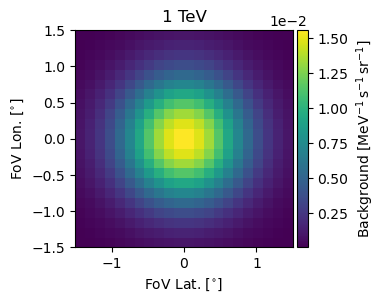

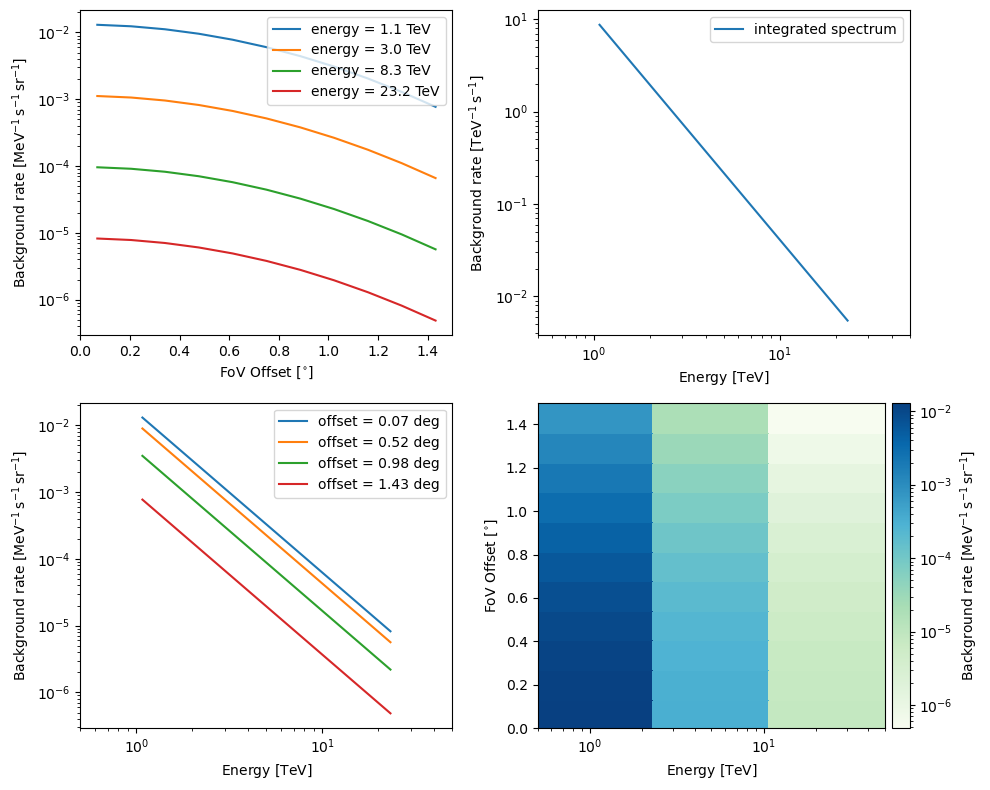

In [15]:
accmodel = sim.BaseSimBMVCreator()
accmodel.load_true_background_irfs(path_config) 

# Get the true model downsampled to the output model binning
true_down = accmodel.get_background_irf(type='true',downsampled=True) 
true_down.plot_at_energy(["1 TeV"],figsize=(3,3))
plt.show()

# You can also plot directly from the class object.
if accmodel.true_collection: accmodel.bkg_true_down_irf[0].peek()
else: accmodel.bkg_true_down_irf.peek()

In [16]:
do_accmodel = True
if do_accmodel: accmodel.do_acceptance_modelisation()
else: accmodel.load_output_background_irfs()

INFO:gammapy.data.data_store:Observations selected: 4 out of 4.


Obs collection loading pattern: obs_*gaussian_background.fits
Available sources:    OBJECT  
----------
model-simu
4 available runs:  [1 2 3 4]
Total simulated livetime: 1.3 h


/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:357: GammapyDeprecationWarning: obs_info property is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:93: GammapyDeprecationWarning: obs_info argument is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:357: GammapyDeprecationWarning: obs_info property is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:93: GammapyDeprecationWarning: obs_info argument is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/min

Obs collection loading pattern: _with_bkg_3d_stack_circle_Ebins_3_offsetbins_11_offset_max_1.5_exclurad_00.3
Available sources:    OBJECT  
----------
model-simu
4 available runs:  [1 2 3 4]
Total simulated livetime: 1.3 h


In [17]:
# Change any parameter you need for the modeling in the config file if you don't want to work with the original one
tmp_config["acceptance"]["method"] = 'fit'
with open(path_tmp_config, 'w') as file: yaml.dump(tmp_config, file)

do_accmodel = True
if do_accmodel: accmodel.do_acceptance_modelisation(path_tmp_config) # Keep the loaded observation but reinitialize model parameters with temporary config file
else: accmodel.load_output_background_irfs(path_tmp_config)

acceptance: {'collection': True, 'cos_zenith_binning': {'cos_zenith_binning_method': 'min_livetime_per_wobble', 'cos_zenith_binning_parameter_value': 3000, 'initial_cos_zenith_binning': 0.01, 'runwise_normalisation': False, 'zenith_binning': False}, 'energy': {'e_max': 50, 'e_min': 0.5, 'nbin': 3, 'unit': 'TeV'}, 'fit': {'bounds': {'psi': [0, 0], 'x_cm': [0, 0], 'y_cm': [0, 0]}, 'fnc': 'bilinear_gaussian2d', 'minuit_print_level': 0}, 'method': 'fit', 'offset': {'nbin': 11, 'offset_max': 1.5}, 'single_file_path': '/fefs/aswg/workspace/ali.baktash/simulation_data/centered_full_gaussian/no_exlcusion/teststacked_exclusion_map.fits'}
background: {'maker': {'correlation_radius': 0.08, 'fov': {'method': 'scale'}, 'ring': {'internal_ring_radius': 0.3, 'width': 0.1}}, 'spatial_model': {'e': 0, 'lat_0': 0, 'lat_grad': 0, 'lat_grad_variation': False, 'lon_0': 0, 'lon_grad': 0, 'lon_grad_variation': False, 'model': 'GaussianSpatialModel_LinearGradient', 'phi': 0, 'sigma': 0.6, 'unit': 'deg'}, 'spe

INFO:gammapy.data.data_store:Observations selected: 4 out of 4.


Available sources:    OBJECT  
----------
model-simu
4 available runs:  [1 2 3 4]
Total simulated livetime: 1.3 h


/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:357: GammapyDeprecationWarning: obs_info property is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:93: GammapyDeprecationWarning: obs_info argument is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:357: GammapyDeprecationWarning: obs_info property is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/data/observations.py:93: GammapyDeprecationWarning: obs_info argument is deprecated since v1.2. Use meta instead.
  warnings.warn(
/fefs/aswg/workspace/marie-sophie.carrasco/min

Obs collection loading pattern: _with_bkg_3d_fit_circle_Ebins_3_offsetbins_11_offset_max_1.5_exclurad_00.3
Available sources:    OBJECT  
----------
model-simu
4 available runs:  [1 2 3 4]
Total simulated livetime: 1.3 h


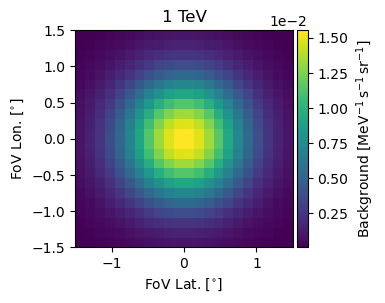

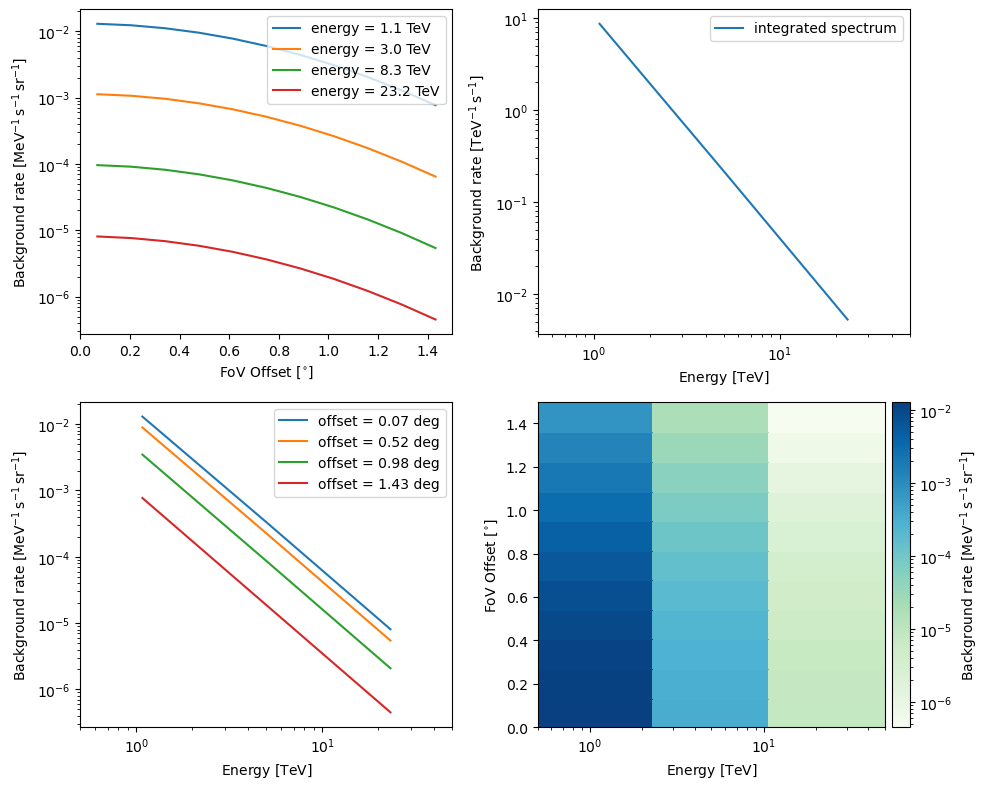

In [18]:
if accmodel.out_collection: 
    accmodel.bkg_output_irf_collection[1].plot_at_energy(["1 TeV"],figsize=(3,3))
    accmodel.bkg_output_irf_collection[1].peek()
else: 
    accmodel.bkg_output_irf.plot_at_energy(["1 TeV"],figsize=(3,3))
    accmodel.bkg_output_irf.peek()